# Audio Features - Comparing Groups

Exploratory data analysis and statistical compaisons between the treatment (mindfulness practice) and control groups.

Goal: identify features that show largest differences between the two groups to select some prominent features for a classification model.

In [29]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data_path = './data/'

In [4]:
# Read in audio and transcript features
df_audio = pd.read_csv(data_path + 'Teacher_Mindfulness_Audio_Transcript_Features_20230214.csv')
df_audio.head()

,ID,Total_Duration,Teacher_Duration,Student_Duration,Percent_Time_Teacher,Average_Speaker_Duration,Average_Teacher_Duration,Average_Student_Duration,Total_Word_Count,Teacher_Word_Count,Student_Word_Count,Teacher_Percent_Words,Total_Word_Rate,Teacher_Word_Rate,Student_Word_Rate,Total_Speaker_Line_Count,Teacher_Line_Count,Student_Line_Count,number_ of_syllables,number_of_pauses,rate_of_speech,articulation_rate,speaking_duration,original_duration,balance,f0_mean,f0_std,f0_median,f0_min,f0_max,f0_quantile25,f0_quan75,Mood,MFCC_1_Mean,MFCC_2_Mean,MFCC_3_Mean,MFCC_4_Mean,MFCC_5_Mean,MFCC_6_Mean,MFCC_7_Mean,MFCC_8_Mean,MFCC_9_Mean,MFCC_10_Mean,MFCC_11_Mean,MFCC_12_Mean,MFCC_13_Mean,MFCC_1_Var,MFCC_2_Var,MFCC_3_Var,MFCC_4_Var,MFCC_5_Var,MFCC_6_Var,MFCC_7_Var,MFCC_8_Var,MFCC_9_Var,MFCC_10_Var,MFCC_11_Var,MFCC_12_Var,MFCC_13_Var,MFCC_1_Skew,MFCC_2_Skew,MFCC_3_Skew,MFCC_4_Skew,MFCC_5_Skew,MFCC_6_Skew,MFCC_7_Skew,MFCC_8_Skew,MFCC_9_Skew,MFCC_10_Skew,MFCC_11_Skew,MFCC_12_Skew,MFCC_13_Skew,MFCC_1_Kurtosis,MFCC_2_Kurtosis,MFCC_3_Kurtosis,MFCC_4_Kurtosis,MFCC_5_Kurtosis,MFCC_6_Kurtosis,MFCC_7_Kurtosis,MFCC_8_Kurtosis,MFCC_9_Kurtosis,MFCC_10_Kurtosis,MFCC_11_Kurtosis,MFCC_12_Kurtosis,MFCC_13_Kurtosis,RMS_Mean,RMS_Max,RMS_Min,RMS_Std,Centroid_Mean,Centroid_Max,Centroid_Min,Centroid_Std,Bandwidth_Mean,Bandwidth_Max,Bandwidth_Min,Bandwidth_Std,Flatness_Mean,Flatness_Max,Flatness_Min,Flatness_Std,Zero_Crossing_Rate_Mean,Zero_Crossing_Rate_Max,Zero_Crossing_Rate_Min,Zero_Crossing_Rate_Std,Loudness_Mean,Loudness_Max,Loudness_Min,Loudness_Std
0,332,308.563991,141,167.563991,0.456955,9.075411,8.294118,9.856705,697,305,392,0.437590,2.258851,2.163121,2.339405,34,17,17,411,62,3.0,4,93.5,144.6,0.6,211.67,53.96,204.2,73,409,181,242,Reading,12.275767,11.248416,-11.403405,8.994111,-6.947085,3.552934,-2.149697,-13.171859,-11.721801,-13.183566,0.719455,-1.359205,2.892683,59.003330,428.052921,376.570811,480.629189,271.816805,240.442430,250.107968,218.737862,230.139384,183.706385,173.748565,163.662589,96.546882,-4.427178,-0.384546,-0.256914,0.305199,-0.266844,-0.182173,-0.167009,-0.289583,-0.229382,-0.212150,0.169246,0.047610,0.078353,24.993674,-1.021163,-0.388692,-0.197681,-0.027963,0.335898,0.345799,0.218810,0.077423,0.002506,0.748178,0.050016,0.413932,0.029641,0.234953,0.0,0.030134,1786.920458,9837.121455,0.0,1342.793978,1637.887678,4029.576143,0.0,736.167078,0.019112,1.000001,1.480000e-06,0.101342,0.106655,0.724121,0.0,0.111820,-41.060013,-12.580391,-92.580391,19.036415
1,348,309.289320,86,223.289320,0.278057,6.580624,3.739130,9.303722,698,195,503,0.279370,2.256787,2.267442,2.252683,47,23,24,255,39,3.0,5,50.5,86.0,0.6,244.32,56.67,242.1,80,421,208,278,speaking passionately,10.869401,9.074677,-11.908164,7.795241,-7.867180,-0.395680,-6.808521,-14.854105,-5.608134,0.335741,2.010402,-11.104792,-2.374372,117.844373,443.504212,340.872066,421.846288,392.088738,269.676208,282.780823,278.891346,201.598711,184.257387,180.524235,156.742620,103.860091,-3.403572,-0.447509,-0.170911,0.054505,-0.355915,0.015943,-0.269408,-0.323910,-0.181812,0.243745,0.255444,-0.148239,-0.153220,12.028351,-0.977772,-0.562810,-0.102892,-0.054601,0.898272,0.406222,-0.280488,0.297556,0.332433,0.374174,-0.063299,0.823779,0.027384,0.194261,0.0,0.029680,1880.643307,9922.177642,0.0,1412.091525,1741.747397,4338.004791,0.0,810.380525,0.038517,1.000001,2.170000e-06,0.168635,0.102524,0.819824,0.0,0.115759,-43.753429,-14.232292,-94.232292,21.297735
2,335,313.918662,145,168.918662,0.461903,6.975970,6.590909,7.344290,1021,567,454,0.555338,3.252435,3.910345,2.687684,45,22,23,427,87,3.0,5,87.3,141.0,0.6,239.45,66.01,232.6,72,424,189,287,speaking passionately,11.718530,5.376386,-16.785159,14.851442,-1.599988,0.735789,-0.782310,-13.534004,-5.126506,-5.123688,-7.457674,-6.685852,-0.191224,103.212547,407.618625,404.010201,325.159615,254.870539,195.726934,270.849372,262.024990,174.123677,163.250007,181.294042,127.413792,87.696152,-3.331619,-0.295017,-0.139161,0.311863,-0.106684,-0.227299,-0.159920,-0.256241,-0.

In [5]:
# Read in survey data
df_survey = pd.read_csv(data_path + 'survey data.csv',
                        usecols = ['studyid', 'mindfulness'])
df_survey.head()


,studyid,mindfulness
0,201,1
1,202,0
2,203,1
3,204,0
4,205,1


In [6]:
# Join datasets
df = df_audio.merge(df_survey, 
                    left_on = 'ID', 
                    right_on = 'studyid')

## Full Treatment versus Control

Compare treatment (mindulness = 1) and control (mindfulness = 0) across all participants (200s and 300s).

### Two Sample T-Test

Compute t-test comparing the differences in means between the treatment and control groups. Loop through each variable and save the t-stat and p-value in a data frame. 

Use [Scipy t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the T-test for the means of two independent samples. This is a test for the null hypothesis that 2 independent samples have identical average (expected) values.

In [7]:
# Get list of all potential features in this data
feature_list = [feat for feat in df.columns if feat not in ['ID', 'studyid', 'mindfulness', 'Mood']]

In [8]:
# Create empty df to hold t-test results
ttest_results = pd.DataFrame()

In [9]:
for feat in feature_list:
    # Separate treatment and control into separate dataframes
    # and select just this feature
    df_0 = df[df['mindfulness']==0]
    df_1 = df[df['mindfulness']==1]
    
    # Compute t test results for this feature
    temp_result = stats.ttest_ind(a = df_0[feat], 
                                  b = df_1[feat],
                                  equal_var = False)
    
    # Add t stat and p value to results df
    df_temp = pd.DataFrame({
                            'feature': feat,
                            'mean_0': df_0[feat].mean(),
                            'mean_1': df_1[feat].mean(),
                            't_statistic': temp_result[0],
                            'p_value': temp_result[1]
                            }, 
                            index = [0])
    
    ttest_results = pd.concat([ttest_results, df_temp], axis=0)


In [10]:
ttest_results.reset_index(inplace = True, drop = True)

In [11]:
# Sort by p-value to see which variables show the largest differences
ttest_results.sort_values('p_value', inplace = True)
ttest_results.head(10)

,feature,mean_0,mean_1,t_statistic,p_value
5,Average_Teacher_Duration,8.770774,7.721627,2.285240,0.024762
9,Student_Word_Count,264.717391,292.534884,-1.840621,0.069809
67,MFCC_11_Skew,0.051254,-0.028348,1.818815,0.072385
102,Zero_Crossing_Rate_Std,0.105381,0.097978,1.703519,0.092466
72,MFCC_3_Kurtosis,-0.375162,-0.504436,1.702287,0.092631
15,Teacher_Line_Count,22.130435,23.651163,-1.683496,0.095866
77,MFCC_8_Kurtosis,0.067956,-0.076068,1.600801,0.114777
13,Student_Word_Rate,2.085660,2.200172,-1.583698,0.116980
101,Zero_Crossing_Rate_Min,0.000053,0.000488,-1.547210,0.128802
76,MFCC_7_Kurtosis,0.343888,0.032315,1.508744,0.136756


In [13]:
ttest_results[ttest_results['feature'] == 'Average_Student_Duration']

,feature,mean_0,mean_1,t_statistic,p_value
6,Average_Student_Duration,5.421464,5.583544,-0.498208,0.619967


Observations: 
- Few features show a statistically significant difference between treatment and control groups. 
- Out of the 107 features we have in this dataset, only one, **average teacher duration** has a p-value less than 0.05. This suggests that the feature with the most difference between treatment and control participants in this sample is the amount of time that the teacher spent talking. From the summary above we can see that the mean for the treatment group, the teachers that participated in the brief mindfulness practice had an average duration of 7.72 seconds, compared to a mean of 8.77 seconds for the control group. This result seems to suggest that teachers who participated in the mindfulness practice spoke for a shorter amount of time before the students/avatars spoke. 
- The feature with the next smallest p-value in this mean differences analysis was **student word count**. With a p-value of 0.070 there seems to be a slight difference in the mean student word count between the treatment and control group. The mean student word count is higher for the treatment group, suggesting that the students spoke more words when the teacher was in the treatment group. However, it is interesting to note that this feature with the p-value of 0.070 is student word count, while other arguably similar features such as average student duration have much higher p-values and thus do not suggest any difference between the treatment and control groups. 
- A handful of MFCC features, primarily skew and kurtosis summary features show up in the top 10 here.

### EDA for Top Features

Now that we've identified some features with some differences between the treatment and control groups we can create some graphs to visualize how these distributions compare between the two groups. To start we'll visualize just the variables with the 10 smallest p-values. 

In [14]:
top_10_feats = ttest_results.head(10).feature.to_list()

Average_Teacher_Duration
Feature: Average_Teacher_Duration
P-value: 0.0248


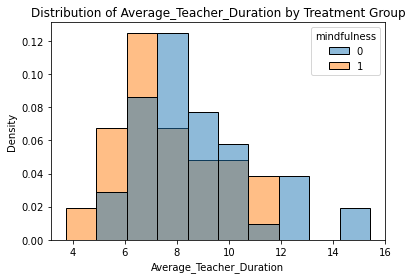

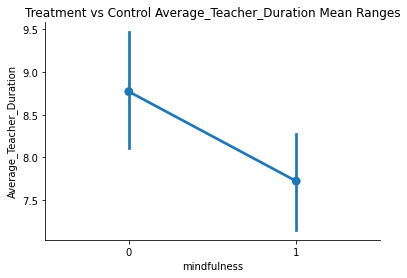


Student_Word_Count
Feature: Student_Word_Count
P-value: 0.0698


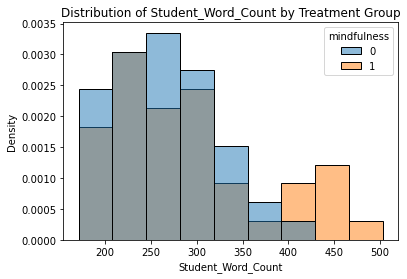

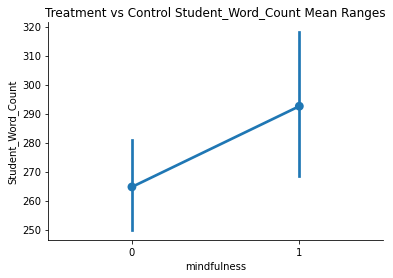


MFCC_11_Skew
Feature: MFCC_11_Skew
P-value: 0.0724


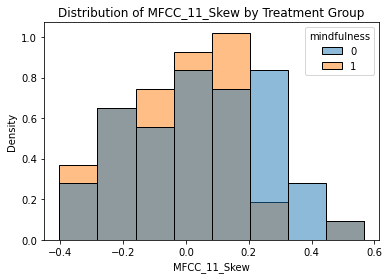

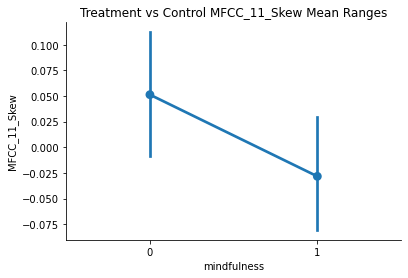


Zero_Crossing_Rate_Std
Feature: Zero_Crossing_Rate_Std
P-value: 0.0925


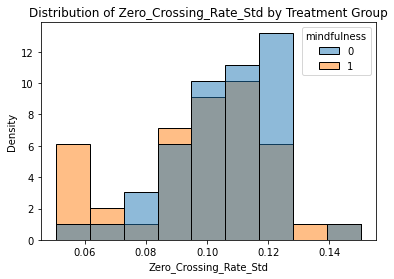

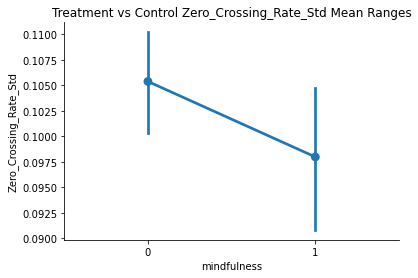


MFCC_3_Kurtosis
Feature: MFCC_3_Kurtosis
P-value: 0.0926


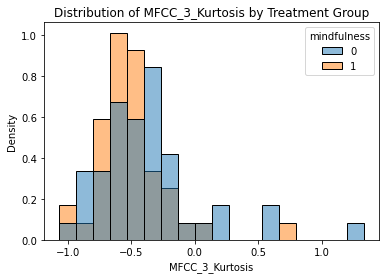

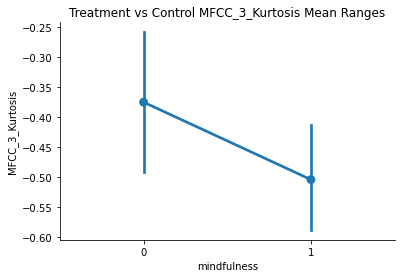


Teacher_Line_Count
Feature: Teacher_Line_Count
P-value: 0.0959


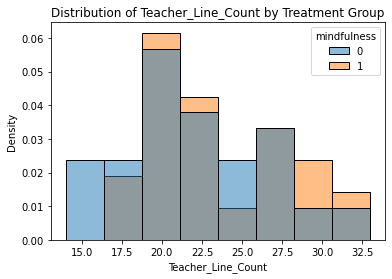

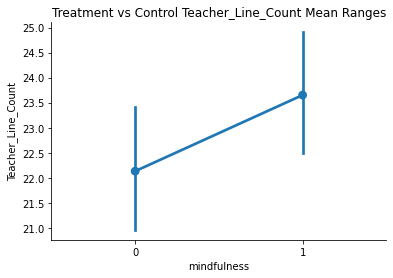


MFCC_8_Kurtosis
Feature: MFCC_8_Kurtosis
P-value: 0.1148


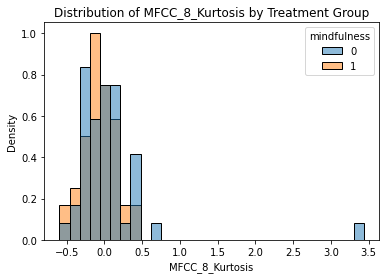

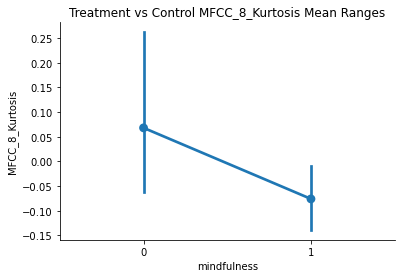


Student_Word_Rate
Feature: Student_Word_Rate
P-value: 0.117


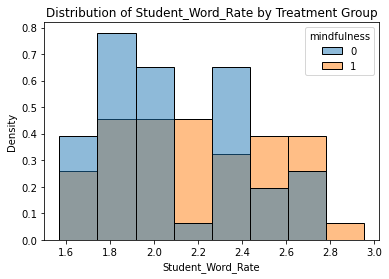

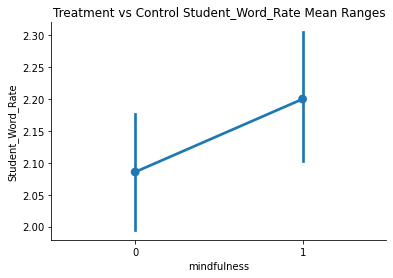


Zero_Crossing_Rate_Min
Feature: Zero_Crossing_Rate_Min
P-value: 0.1288


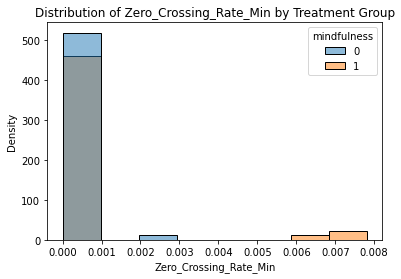

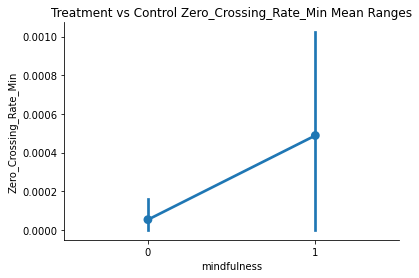


MFCC_7_Kurtosis
Feature: MFCC_7_Kurtosis
P-value: 0.1368


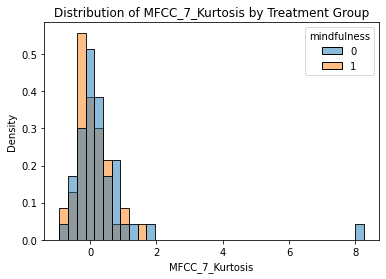

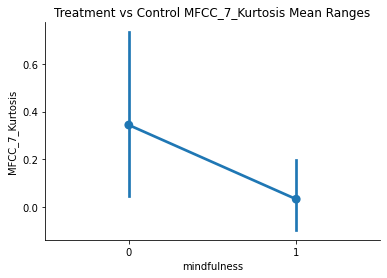

In [15]:
for feat in top_10_feats:
    print(f'Feature: {feat}')
    p_val = ttest_results[ttest_results['feature']==feat]['p_value'].iloc[0]
    print(f'P-value: {round(p_val,4)}')
    
    # Histogram comparing distrubtion of feature by group
    sns.histplot(data = df, 
                 x = feat, 
                 hue = 'mindfulness',
                 stat = 'density')
    plt.title(f'Distribution of {feat} by Treatment Group')
    plt.show()
    
    # Plot comparing means and uncertainty
    sns.pointplot(x = 'mindfulness', y = feat, data = df)
    sns.despine()
    plt.title(f'Treatment vs Control {feat} Mean Ranges')
    plt.show()
    print()

Observations:
- As we can see in the visuals above, there is quite a bit of overlap in many of these feature distributions. This overlap between the treatment and control groups is consistent with the mostly statistically insignifcany p-values in our mean differences results above. 

## 300s Treatment versus Control

After reviewing the t-tests (mean difference) results from the Full Data (200s + 300s), we wondered whether covid had an impact on the results for participants in the 200s. Thus, we'd like to perform a similar analysis just using participats from the 300s to see whether we observe any difference in the signifcance of the mean differences between the treatment and control participants for this subset of the study. 


Compare treatment (mindulness = 1) and control (mindfulness = 0) across 300s participants.

In [19]:
# Filter to 300s
df_300s = df[df['ID'] >= 300]

### Two Sample T-Test

Compute t-test comparing the differences in means between the treatment and control groups. Loop through each variable and save the t-stat and p-value in a data frame. 

Use [Scipy t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the T-test for the means of two independent samples. This is a test for the null hypothesis that 2 independent samples have identical average (expected) values.

In [20]:
# Create empty df to hold t-test results
ttest_results_300s = pd.DataFrame()

In [21]:
for feat in feature_list:
    # Separate treatment and control into separate dataframes
    # and select just this feature
    df_0 = df_300s[df_300s['mindfulness']==0]
    df_1 = df_300s[df_300s['mindfulness']==1]
    
    # Compute t test results for this feature
    temp_result = stats.ttest_ind(a = df_0[feat], 
                                  b = df_1[feat],
                                  equal_var = False)
    
    # Add t stat and p value to results df
    df_temp = pd.DataFrame({
                            'feature': feat,
                            'mean_0': df_0[feat].mean(),
                            'mean_1': df_1[feat].mean(),
                            't_statistic': temp_result[0],
                            'p_value': temp_result[1]
                            }, 
                            index = [0])
    
    ttest_results_300s = pd.concat([ttest_results_300s, df_temp], axis=0)


In [22]:
ttest_results_300s.reset_index(inplace = True, drop = True)

In [23]:
# Sort by p-value to see which variables show the largest differences
ttest_results_300s.sort_values('p_value', inplace = True)
ttest_results_300s.head(10)

,feature,mean_0,mean_1,t_statistic,p_value
96,Flatness_Max,1.000001,1.000001,5.099020,0.000026
72,MFCC_3_Kurtosis,-0.277589,-0.498436,2.624998,0.012016
46,MFCC_3_Var,325.026791,347.537683,-2.039705,0.046067
9,Student_Word_Count,278.545455,316.851852,-1.903967,0.064269
67,MFCC_11_Skew,0.139512,0.052864,1.884240,0.064727
69,MFCC_13_Skew,-0.200162,-0.132644,-1.687962,0.097220
10,Teacher_Percent_Words,0.637906,0.593224,1.553015,0.128104
71,MFCC_2_Kurtosis,-0.661663,-0.835262,1.523000,0.133548
77,MFCC_8_Kurtosis,0.161243,-0.015666,1.480965,0.146228
6,Average_Student_Duration,5.467670,6.084999,-1.441447,0.157638


Observations: 
- The features with the lowest p-values here are farily different than the full participant results. 
- Although the p-value for Flatness_Max looks great, the mean is actually the same for both the treatment and control group so there clearly is not an actually difference here. 
- A number of the MFCC features show up in the top 10 here, again primarily skew and kurtosis features.
- The for the third MFCC coefficient has a statistically signifcant (<0.05) p-value for both kurtosis and variance. 
- Like in the full results summary, **student word count** has a p-value less tha 0.10 and again we see a higher mean student word count for treatment group participants. 



### EDA for Top Features

Now that we've identified some features with some differences between the treatment and control groups we can create some graphs to visualize how these distributions compare between the two groups. To start we'll visualize just the variables with the 10 smallest p-values. As we can see in the visuals below, there is quite a bit of overlap in many of these feature distributions. This overlap between the treatment and control groups is consistent with the mostly statistically insignifcany p-values in our mean differences results above. 

In [26]:
top_10_feats = ttest_results_300s.head(10).feature.to_list()

Feature: Flatness_Max
P-value: 0.0


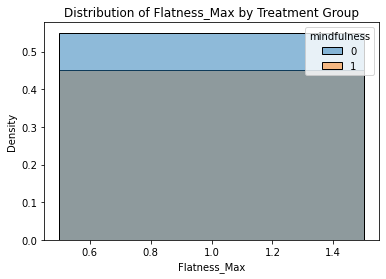

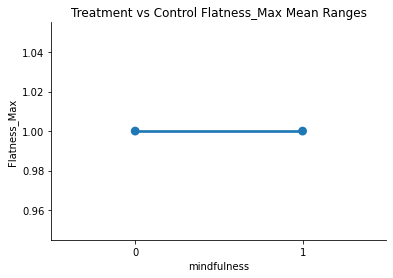


Feature: MFCC_3_Kurtosis
P-value: 0.012


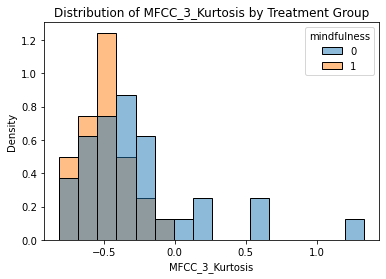

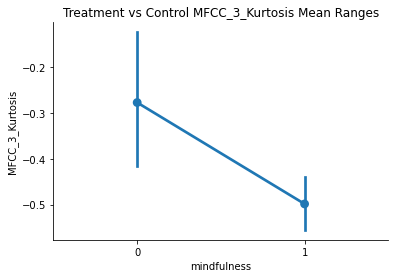


Feature: MFCC_3_Var
P-value: 0.0461


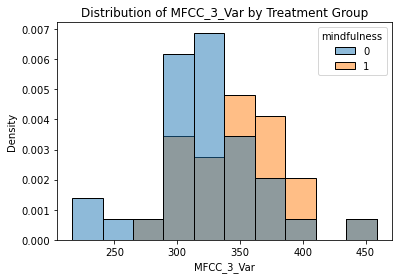

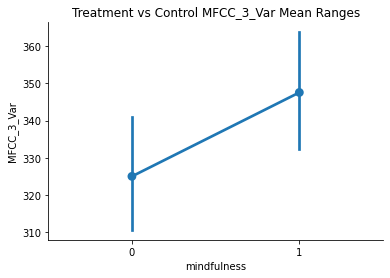


Feature: Student_Word_Count
P-value: 0.0643


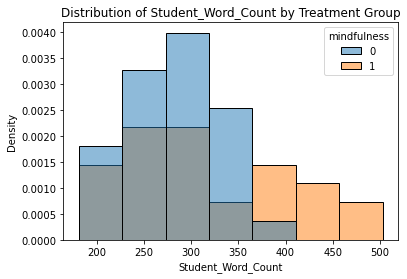

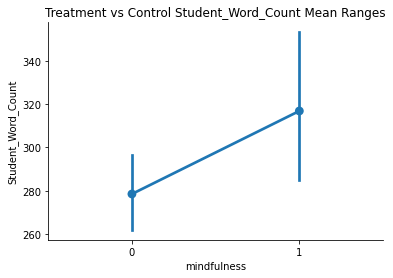


Feature: MFCC_11_Skew
P-value: 0.0647


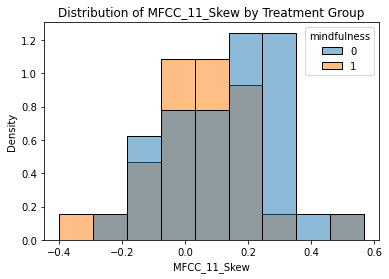

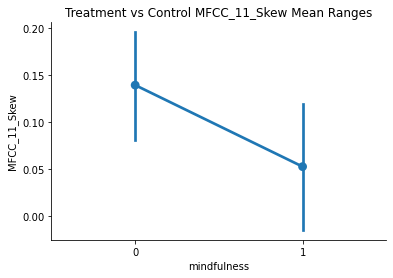


Feature: MFCC_13_Skew
P-value: 0.0972


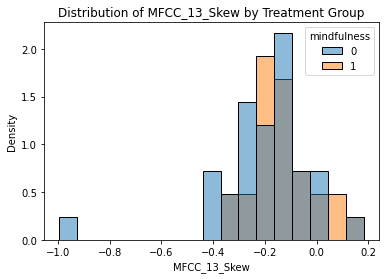

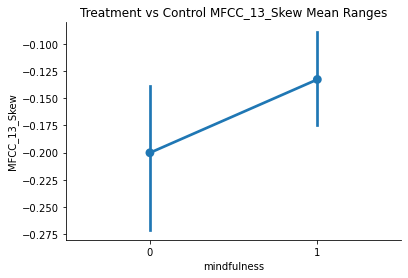


Feature: Teacher_Percent_Words
P-value: 0.1281


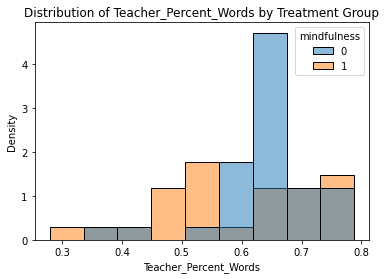

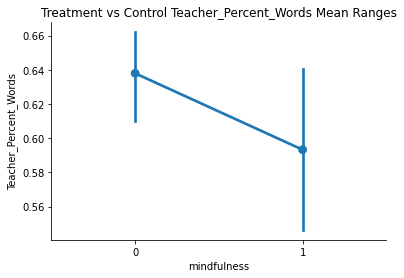


Feature: MFCC_2_Kurtosis
P-value: 0.1335


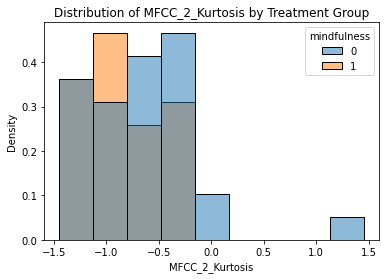

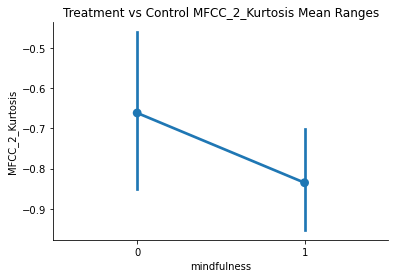


Feature: MFCC_8_Kurtosis
P-value: 0.1462


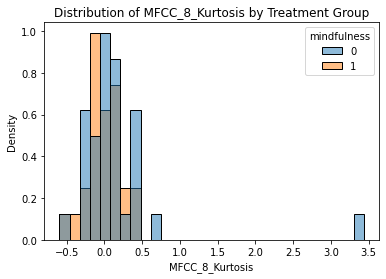

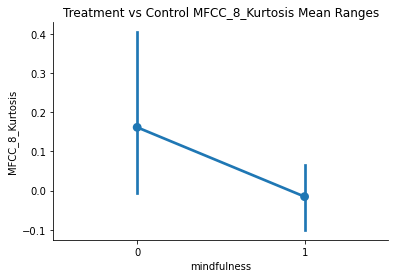


Feature: Average_Student_Duration
P-value: 0.1576


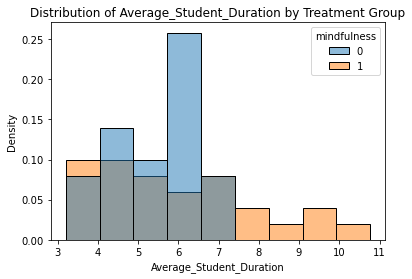

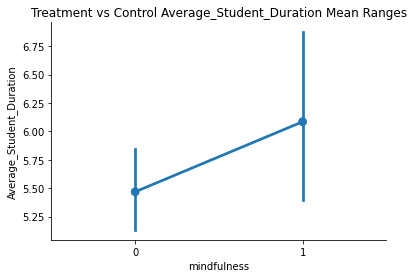

In [27]:
for feat in top_10_feats:
    print(f'Feature: {feat}')
    p_val = ttest_results_300s[ttest_results_300s['feature']==feat]['p_value'].iloc[0]
    print(f'P-value: {round(p_val,4)}')
    
    # Histogram comparing distrubtion of feature by group
    sns.histplot(data = df_300s, 
                 x = feat, 
                 hue = 'mindfulness',
                 stat = 'density')
    plt.title(f'Distribution of {feat} by Treatment Group')
    plt.show()
    
    # Plot comparing means and uncertainty
    sns.pointplot(x = 'mindfulness', y = feat, data = df_300s)
    sns.despine()
    plt.title(f'Treatment vs Control {feat} Mean Ranges')
    plt.show()
    print()

## 300s versus 200s

Although not the original research question, the impact of the COVID-19 pandemic on teachers participats in this study is another interesting questions. In the "300s Treatment versus Control" section above we looked only at 300s teachers because some particpants had more experience partipating in the virtual teaching simulation due to COVID. Thus, now instead of comparing treatment and control groups we're curious if there are actually more differences between the 200s versus 300s partipants. 


Compare 200s and 300s participants.

In [32]:
# Add column for 200s vs 300s
df['group'] = np.where(df['ID'] >= 300, '300s', '200s')

### Two Sample T-Test

Compute t-test comparing the differences in means between the treatment and control groups. Loop through each variable and save the t-stat and p-value in a data frame. 

Use [Scipy t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the T-test for the means of two independent samples. This is a test for the null hypothesis that 2 independent samples have identical average (expected) values.

In [33]:
# Create empty df to hold t-test results
ttest_results_200s_v_300s = pd.DataFrame()

In [34]:
for feat in feature_list:
    # Separate treatment and control into separate dataframes
    # and select just this feature
    df_0 = df[df['group']=='200s']
    df_1 = df[df['group']=='300s']
    
    # Compute t test results for this feature
    temp_result = stats.ttest_ind(a = df_0[feat], 
                                  b = df_1[feat],
                                  equal_var = False)
    
    # Add t stat and p value to results df
    df_temp = pd.DataFrame({
                            'feature': feat,
                            'mean_200s': df_0[feat].mean(),
                            'mean_300s': df_1[feat].mean(),
                            't_statistic': temp_result[0],
                            'p_value': temp_result[1]
                            }, 
                            index = [0])
    
    ttest_results_200s_v_300s = pd.concat([ttest_results_200s_v_300s, df_temp], axis=0)


In [35]:
ttest_results_200s_v_300s.reset_index(inplace = True, drop = True)

In [36]:
# Sort by p-value to see which variables show the largest differences
ttest_results_200s_v_300s.sort_values('p_value', inplace = True)
ttest_results_200s_v_300s.head(10)

,feature,mean_200s,mean_300s,t_statistic,p_value
57,MFCC_1_Skew,-0.801221,-3.750443,25.878138,2.711811e-39
96,Flatness_Max,0.131880,1.000001,-84.765909,2.640238e-35
88,Centroid_Max,6372.384819,9724.467505,-21.033697,6.427598e-33
98,Flatness_Std,0.009449,0.157904,-22.592488,2.108547e-31
93,Bandwidth_Min,384.041096,0.000000,39.676015,3.734963e-26
105,Loudness_Min,-73.697797,-94.596889,29.561133,1.679432e-24
45,MFCC_2_Var,256.305721,409.522981,-16.844373,4.062862e-24
70,MFCC_1_Kurtosis,-0.535417,16.928835,-15.364110,2.065599e-22
95,Flatness_Mean,0.003358,0.037720,-13.694469,2.557754e-20
44,MFCC_1_Var,17.760579,107.627491,-13.420670,1.014951e-19


Observations: 
- Interestingly, the p-values for the mean comparisons between the 200s versus 300s participants are much more significant than when comparing treatment and control participants. 
- All of the top 10 features (those with the smallest p-values) are features generated from the audio waves (e.g. MFCC, flatness, centroid, etc.) versus the more transcript-based features (e.g. average duration, word count, line count, etc). 
- See visuals below that are making me question these results.

### EDA for Top Features

Now that we've identified some features with some differences between the treatment and control groups we can create some graphs to visualize how these distributions compare between the two groups. To start we'll visualize just the variables with the 10 smallest p-values. As we can see in the visuals below, there is quite a bit of overlap in many of these feature distributions. This overlap between the treatment and control groups is consistent with the mostly statistically insignifcany p-values in our mean differences results above. 

In [40]:
top_10_feats = ttest_results_200s_v_300s.head(10).feature.to_list()

Feature: MFCC_1_Skew
P-value: 0.0


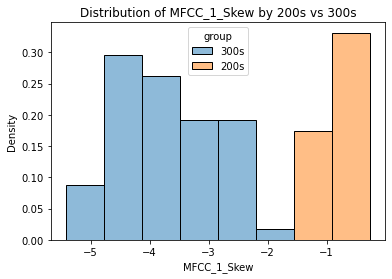

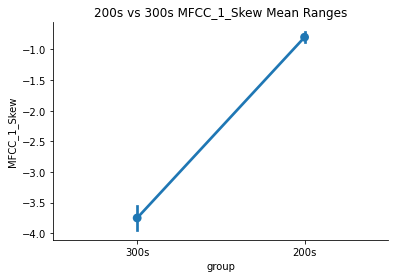


Feature: Flatness_Max
P-value: 0.0


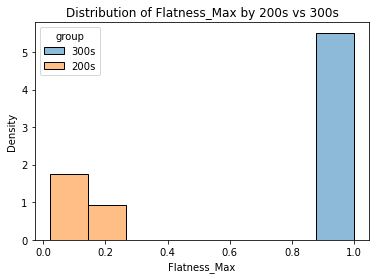

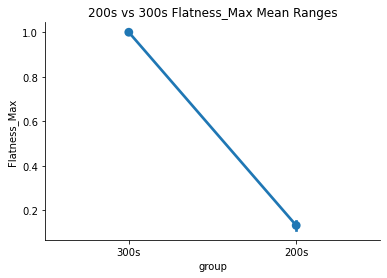


Feature: Centroid_Max
P-value: 0.0


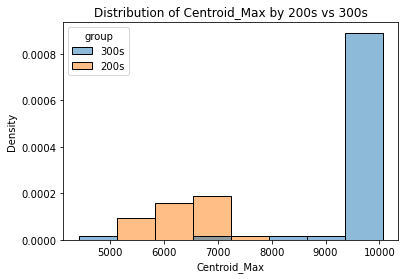

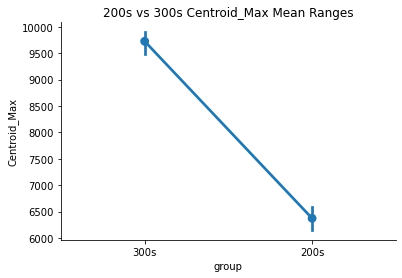


Feature: Flatness_Std
P-value: 0.0


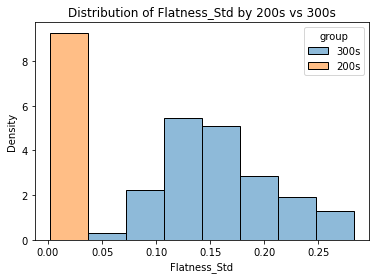

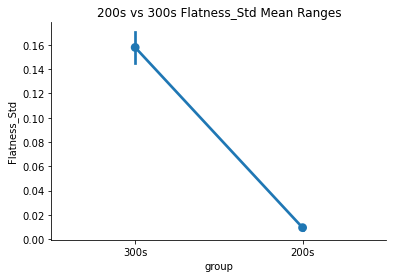


Feature: Bandwidth_Min
P-value: 0.0


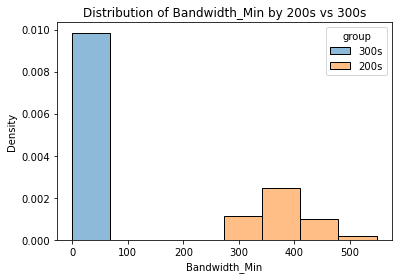

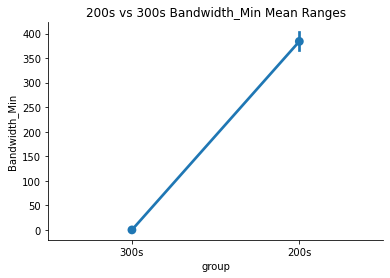


Feature: Loudness_Min
P-value: 0.0


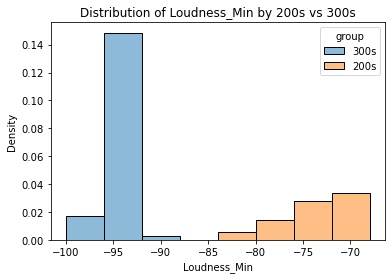

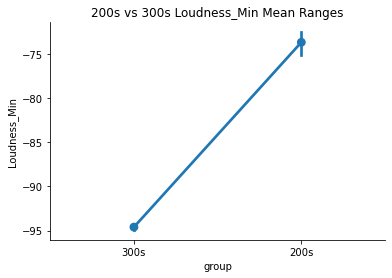


Feature: MFCC_2_Var
P-value: 0.0


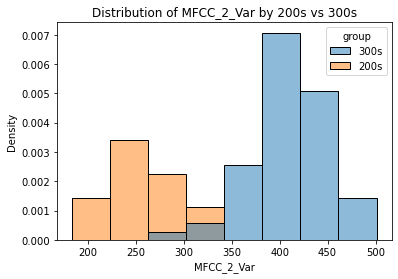

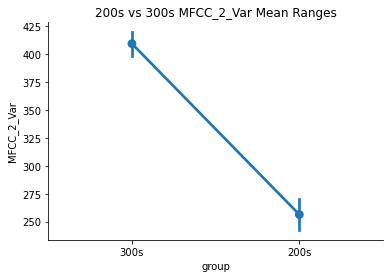


Feature: MFCC_1_Kurtosis
P-value: 0.0


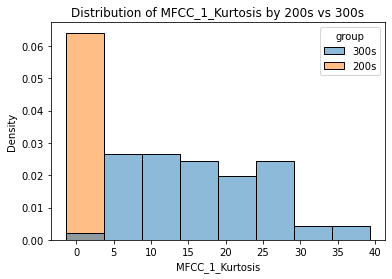

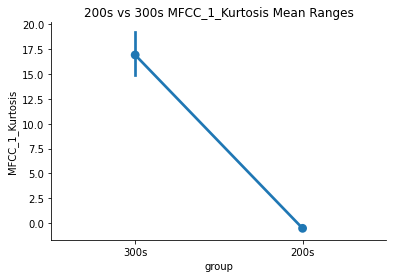


Feature: Flatness_Mean
P-value: 0.0


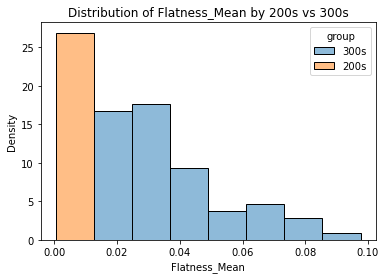

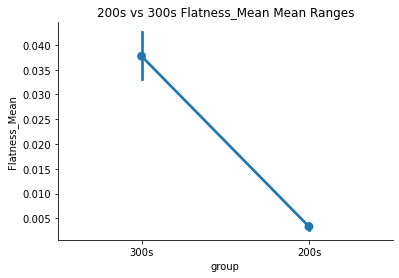


Feature: MFCC_1_Var
P-value: 0.0


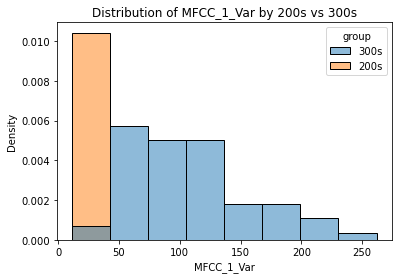

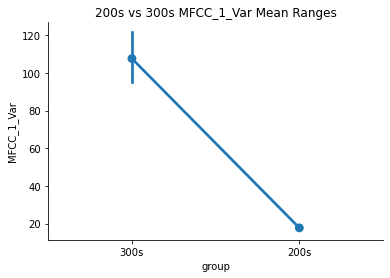

In [41]:
for feat in top_10_feats:
    print(f'Feature: {feat}')
    p_val = ttest_results_200s_v_300s[ttest_results_200s_v_300s['feature']==feat]['p_value'].iloc[0]
    print(f'P-value: {round(p_val,4)}')
    
    # Histogram comparing distrubtion of feature by group
    sns.histplot(data = df, 
                 x = feat, 
                 hue = 'group',
                 stat = 'density')
    plt.title(f'Distribution of {feat} by 200s vs 300s')
    plt.show()
    
    # Plot comparing means and uncertainty
    sns.pointplot(x = 'group', y = feat, data = df)
    sns.despine()
    plt.title(f'200s vs 300s {feat} Mean Ranges')
    plt.show()
    print()

Observations:
- Looking at some of these plots I wonder about the accuracy of this data. Are these actual differences between participants? Or were there changes in the data collection methods between the two years of the experiment? What could be causing almost zero variation for some of these features within a group of participants? If these results are showing such clear differences between teh 200s and 300s can we even trust the results comparing treatment and control groups?

## T-tests comparing stress measures in survey data

In [42]:
df_survey = pd.read_csv(data_path + 'survey data.csv')
df_survey.head()

,Unnamed: 0,studyid,mindfulness,Race,Gender,firstgenedu,efficacy,perceived_overall_stress,burnout,anticipatory_stress,ever_practiced_mindfulness,perceived_sim_stress,emotional_labor,mod_intense_exercise,high_intense_exercise,caffeine_use,tobacco_use,alcohol_use
0,0,201,1,4.0,0.0,NaN,4.4,5.4,4.25,6.00,1.0,5.50,3.181818,1.0,0.0,0.0,0.0,NaN
1,1,202,0,1.0,0.0,NaN,4.6,2.0,1.00,2.25,1.0,3.25,2.909091,1.0,1.0,1.0,0.0,NaN
2,2,203,1,1.0,0.0,NaN,3.6,4.0,3.25,4.75,1.0,3.75,3.909091,0.0,0.0,1.0,0.0,NaN
3,3,204,0,6.0,0.0,NaN,3.6,2.8,4.00,3.50,NaN,3.50,3.545455,2.0,1.0,1.0,0.0,NaN
4,4,205,1,1.0,0.0,NaN,3.4,4.4,5.75,3.75,0.0,3.50,3.454545,0.0,1.0,0.0,0.0,0.0


In [43]:
# Get list of all potential features in this data
survey_feature_list = ['efficacy', 'perceived_overall_stress', 'burnout', 
                       'anticipatory_stress', 'perceived_sim_stress', 'emotional_labor']

In [44]:
# Create empty df to hold t-test results
survey_ttest_results = pd.DataFrame()

In [45]:
for feat in survey_feature_list:
    # Separate treatment and control into separate dataframes
    # and select just this feature
    survey_df_0 = df_survey[df_survey['mindfulness']==0]
    survey_df_1 = df_survey[df_survey['mindfulness']==1]
    
    # Compute t test results for this feature
    temp_result = stats.ttest_ind(a = survey_df_0[feat], 
                                  b = survey_df_1[feat],
                                  equal_var = False,
                                  nan_policy = 'omit')
    
    # Add t stat and p value to results df
    df_temp = pd.DataFrame({
                            'feature': feat,
                            'mean_0': survey_df_0[feat].mean(),
                            'mean_1': survey_df_1[feat].mean(),
                            't_statistic': temp_result[0],
                            'p_value': temp_result[1]
                            }, 
                            index = [0])
    
    survey_ttest_results = pd.concat([survey_ttest_results, df_temp], axis=0)


In [46]:
survey_ttest_results.reset_index(inplace = True, drop = True)

In [47]:
# Sort by p-value to see which variables show the largest differences
survey_ttest_results.sort_values('p_value', inplace = True)
survey_ttest_results.head(10)

,feature,mean_0,mean_1,t_statistic,p_value
3,anticipatory_stress,3.070652,3.386364,-1.573987,0.119302
1,perceived_overall_stress,3.395238,3.625641,-1.233451,0.221065
5,emotional_labor,3.195652,3.037421,0.854718,0.395081
2,burnout,3.625000,3.467949,0.575508,0.566602
0,efficacy,3.776190,3.814103,-0.232007,0.817148
4,perceived_sim_stress,3.385870,3.387597,-0.007486,0.994044
